# Regresión Lineal

### Importamos el Dataset

In [ ]:

import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/DL_course/Clase_2')

Mounted at /content/drive


In [ ]:
import pandas as pd, numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/DL_course/Clase_2/Advertising.csv')

In [ ]:
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [ ]:
print(data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb78423a750>,
      dtype=object)

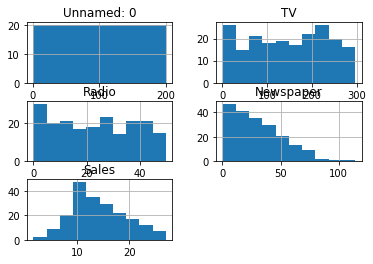

In [ ]:
data.hist()

### Vamos a visualizar los datos

In [ ]:
from matplotlib import pyplot as plt

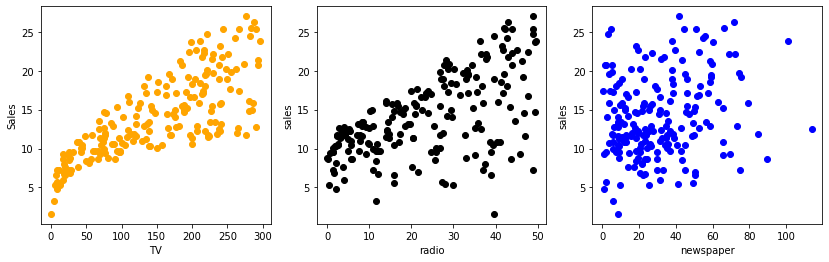

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(data['TV'], data['Sales'], color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(data['Radio'], data['Sales'], color = 'black')
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(data['Newspaper'], data['Sales'], color = 'blue')
plt.xlabel('newspaper')
plt.ylabel('sales')


plt.show()

### Para practicar programación veremos un modelo matemático sencillo llamado regresión lineal

La regresión lineal es una técnica estadística de aprendizaje supervisado para predecir la variable cuantitativa formando una relación lineal con una o más características independientes.

Ayuda a determinar:

- Si una variable independiente hace un buen trabajo en la predicción de la variable dependiente.
- Qué variable independiente desempeña un papel importante en la predicción de la variable dependiente.

Para que funcione los datos deben cumplir algunos criterios.


La regresión lineal encuentra los parámetros de la línea que mejor se ajusta a los datos, es decir, la pendiente ($\theta_1$) y la constante o intercepto ($\theta_0$) en este caso.

$$h_\theta(x) = \theta_1x + \theta_0$$


## Pero primero... veamos que tan relacionados están los datos

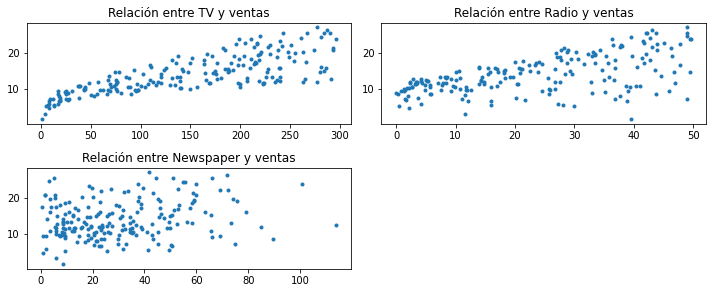

In [ ]:
def plotCaracteristicas(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(data[col],data["Sales"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

col_names = ['TV', 'Radio', 'Newspaper']
plotCaracteristicas(col_names,"Relación entre %s y ventas")

Covarianza

La covarianza entre dos variables aleatorias $X$ e $Y$ se define como:
$$Cov(X, Y) = E[(X - E[X])(Y - E[Y])$$

Dado que las variables aleatorias $X$ e $Y$ son discretas y están definidas como $X = \{x_1, x_2,..., x_n\}$ y $Y = \{y_1, y_2,..., y_n\}$ con igual probabilidad para todos sus elementos entonces la covarianza se puede definir como:

$$Cov(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - E[X])(y_i - E[Y])$$

In [ ]:
def covarianza(X, Y):
  suma = 0
  for x, y in zip(X, Y):
    suma +=((x - np.mean(X)) * (y - np.mean(Y)))
  return suma * 1/(len(X))

In [ ]:
colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(covarianza(data[col],data['Sales']))

348.6382437499999
44.41250999999999
25.811684999999994


In [ ]:
from numpy import cov

for col in colnames:
  print(cov(data[col],data['Sales'], bias = True)[0, 1])

348.63824374999996
44.412509999999976
25.811684999999997


Interpretación de la covarianza
Si ${\displaystyle Cov(X, Y)>{0}}$ hay dependencia directa (positiva), es decir, a grandes valores de ${\displaystyle X}$ corresponden grandes valores de ${\displaystyle Y}$.
Si ${\displaystyle Cov(X, Y)={0}}$ se interpreta como la no existencia de una relación lineal entre las dos variables.
Si ${\displaystyle Cov(X, Y)<{0}}$ hay dependencia inversa o negativa, es decir, a grandes valores de ${\displaystyle X}$ corresponden pequeños valores de ${\displaystyle Y}$.

###Caso Multivariable###
Si $\mathbf {X}$ es un vector aleatorio de dimensión $n$, es decir, $\mathbf {X}$ $=(X_{1},\ldots ,X_{n})^{t}$ donde $X_i$ para $i=1,2,\dots ,n$ son variables aleatorias, la matriz de covarianza, denotada por $\Sigma$, está dada por
$$
{\displaystyle \Sigma ={\begin{pmatrix}\operatorname {Cov} (X_{1},X_{1})&\operatorname {Cov} (X_{1},X_{2})&\cdots &\operatorname {Cov} (X_{1},X_{n})\\\operatorname {Cov} (X_{2},X_{1})&\operatorname {Cov} (X_{2},X_{2})&\cdots &\operatorname {Cov} (X_{2},X_{n})\\\vdots &\vdots &\ddots &\vdots \\\operatorname {Cov} (X_{n},X_{1})&\operatorname {Cov} (X_{n},X_{2})&\cdots &\operatorname {Cov} (X_{n},X_{n})\end{pmatrix}}}$$

es decir, la ${(i,j)}$-ésima entrada de ${\Sigma }$ corresponde a la covarianza entre ${X_{i}}$ y ${X_{j}}$ que puede ser representada como

## Implementar y aplicar a los cuatro vectores que forman parte de los datos que utilizamos.

In [ ]:
col_names = ['TV', 'Radio', 'Newspaper', 'Sales']

matrix = [['_________'] + col_names]
for col1 in col_names:
  row = [col1]
  for col2 in col_names:
    row.append(covarianza(data[col1],data[col2]))
  matrix.append(row)

for row in matrix:
    print(row)
    


['_________', 'TV', 'Radio', 'Newspaper', 'Sales']
['TV', 7334.095143750006, 69.51317999999999, 105.38985499999998, 348.6382437499999]
['Radio', 69.51317999999999, 219.32560399999994, 113.92449399999998, 44.41250999999999]
['Newspaper', 105.38985499999998, 113.92449399999998, 471.9367840000003, 25.811684999999994]
['Sales', 348.6382437499999, 44.41250999999999, 25.811684999999994, 27.08574374999999]


In [ ]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']
print(data[colnames].cov())

                    TV       Radio   Newspaper       Sales
TV         7370.949893   69.862492  105.919452  350.390195
Radio        69.862492  220.427743  114.496979   44.635688
Newspaper   105.919452  114.496979  474.308326   25.941392
Sales       350.390195   44.635688   25.941392   27.221853


### El problema es que no son valores fáciles de interpretar.

#### Correlación de Pearson

Dado un par de variables aleatorias ${\displaystyle (X,Y)}$, el coeficiente de correlación poblacional de Pearson (también denotado por ${\displaystyle \rho _{X,Y}}$) se define como

$${\displaystyle \rho _{X,Y}={\sigma _{XY} \over \sigma _{X}\sigma _{Y}}={\frac {\operatorname {Cov} (X,Y)}{\sqrt {\operatorname {Var} (X)\operatorname {Var} (Y)}}}}$$

donde

- ${\displaystyle \sigma _{XY}}$ es la covarianza de ${\displaystyle (X,Y)}$
- ${\displaystyle \sigma _{X}}$ es la desviación estándar de la variable ${\displaystyle X}$
- ${\displaystyle \sigma _{Y}}$ es la desviación estándar de la variable $Y$

In [ ]:
import math

def covarianza(X, Y):
  suma = 0
  for x, y in zip(X, Y):
    suma +=((x - np.mean(X)) * (y - np.mean(Y)))
  return suma * 1/((len(X) -1))

def correlacion_Pearson(X, Y):
  return covarianza(X, Y) / math.sqrt(covarianza(X, X) * covarianza(Y, Y))

colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(correlacion_Pearson(data[col], data['Sales']))


0.782224424861606
0.5762225745710553
0.22829902637616528


In [ ]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']
print(data[colnames].corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


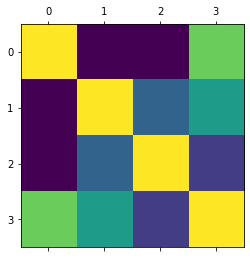

In [ ]:
plt.matshow(data[colnames].corr())

In [ ]:
import seaborn as sns

def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();



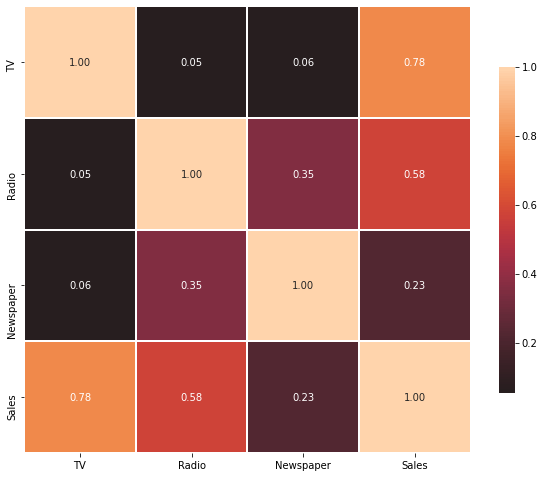

In [ ]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']

mapa_de_calor_correlacion(data)

La regresión lineal encuentra los parámetros de la línea que mejor se ajusta a los datos, es decir, la pendiente ($\theta_1$) y la constante o intercepto ($\theta_0$) en este caso.

$$h_\theta(x) = \theta_1x + \theta_0$$

A partir de ahora llamaremos a $h_\theta(x)$ hipótesis

## ¿Cómo medimos el rendimiento de nuestro modelo?

### Función de costo

Una función de costo nos dice básicamente "lo bueno" que es nuestro modelo a la hora de hacer predicciones.

En nuestro caso función de costo es una función que calcula el error entre los valores de ventas (objetivo) predichos por nuestra hipótesis $h$ y la publicidad realizada en TV, radio o peródicos en el conjunto de entrenamiento.


- Error Cuadrático Medio (MSE, por sus sigles en inglés)

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$

- Error Absoluto Medio (MAE, por sus sigles en inglés)

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}|h_\theta(x_i)- y_i|$$

Aquí $h$ es el valor predicho por nuestro modelos $m$ es el número de muestras.

Programen la función

In [ ]:
def MSE(h, Y):
  return np.sum((h - Y) ** 2) / (2 * (len(h)))

def aplica_hipotesis(X, theta_0, theta_1):
  return theta_1 * X + theta_0

def costo(X, Y, theta_0, theta_1):
  h = aplica_hipotesis(X, theta_0, theta_1)
  cost = MSE(h, Y)
  return h, cost
  
def plot(X, Y, theta_0, theta_1):
  x = np.linspace(0, X.max(), len(X))
  plt.plot(X, Y, marker='.', linestyle='none', label='Y data')
  plt.plot(x, aplica_hipotesis(x, theta_0, theta_1), label='model line')
  # plt.plot(X, aplica_modelo_lineal(x, theta_0, theta_1), marker='.', linestyle='none', label='h')
  plt.legend(loc="upper left")
  plt.show()

### Ajustando nuestro modelo al tanteo

MSE  =  5.503279937499999


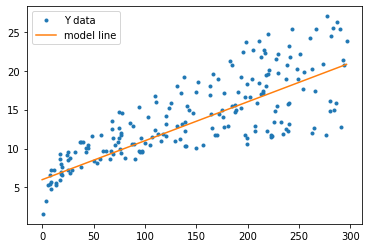

In [ ]:
theta_0, theta_1 = 6, 0.05
X, Y = data['TV'].to_numpy(),data["Sales"].to_numpy()
h, cost = costo(X, Y, theta_0, theta_1)
print('MSE  = ', cost)
plot(X, Y, theta_0, theta_1)


MSE  =  131.237325


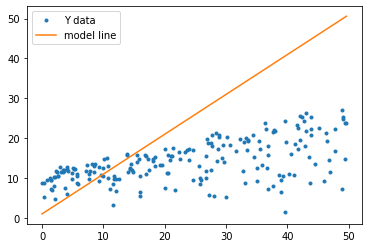

In [ ]:
theta_0, theta_1 = 1, 1
X, Y = data['Radio'].to_numpy(),data["Sales"].to_numpy()
h, cost = costo(X, Y, theta_0, theta_1)
print('MSE  = ', cost)
plot(X, Y, theta_0, theta_1)

MSE  =  377.376325


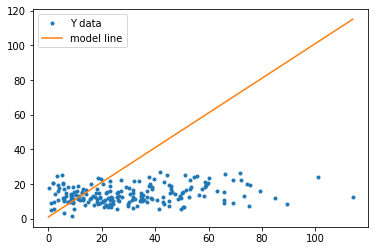

In [ ]:
theta_0, theta_1 = 1, 1
X, Y = data['Newspaper'].to_numpy(),data["Sales"].to_numpy()
h, cost = costo(X, Y, theta_0, theta_1)
print('MSE  = ', cost)
plot(X, Y, theta_0, theta_1)

Estime los mejores valores para $\theta_0$ y $\theta_1$. Es decir:

$$\min_\theta J(\theta)$$


Es decir, intentamos mejorar nuestra hipótesis $h_\theta(x)$, en aprendizaje automático esto es aprender.